# Testing Import functionalities

Changes in import strategy
- defined a few subpackages
- now fully imports subpackage automatically

Name Changes
- spg-module -> sp-module

Default naming
io -> Spio
utils -> Spu
display -> Spd
sp -> Sps


In [1]:
# Do the imports #
##################
#
%matplotlib inline
import os,sys 
import numpy as np
import pandas as pd
from IPython.display import display, Audio, HTML, clear_output
import ipywidgets as widgets
from ipywidgets import Box, HBox, VBox, Layout,interactive
#

import matplotlib.pyplot as plt
import matplotlib as mpl
import librosa

In [2]:
import pyspch.display as Spd
help(Spd.PlotWaveform)
#help(Spd.SpchFig)

Help on function PlotWaveform in module pyspch.display.display:

PlotWaveform(waveform, sample_rate=8000, title=None, seg=None, ypos=0.8, xlabel='Time(sec)', ylabel=None, xticks=True, yticks=True, **kwargs)
    Multichannel waveform plotting



In [3]:
import pyspch.sp as Sps
help(Sps.cepstrum)

Help on function cepstrum in module pyspch.sp.feature:

cepstrum(spg, ncep=13)
    # returns the non truncated cepstrum if ncep is None, otherwise the truncated cepstrum



In [4]:
import pyspch.io as Spio
help(Spio.fetch_hillenbrand)

Help on function fetch_hillenbrand in module pyspch.io.hillenbrand:

fetch_hillenbrand(genders='all', vowels='all', columns=['gender', 'vowel', 'f0', 'F1', 'F2', 'F3'], Debug=False)
    The function fetch_hillenbrand() loads the Hillenbrand dataset in a similar way as the datasets in sklearn.
    There are extra arguments that lets one select parts of the database 
    
    The Hillenbrand dataset is a 1995 repeat and extension of the classic Peterson-Barney(1953) experiment
    in which Formants are established as compact and highly discriminative features for vowel recognition
    (c) 1995 James Hillenbrand
    https://homepages.wmich.edu/~hillenbr/voweldata.html
    
    The interface provided here reads from a copy of the data at ESAT stored in a more 
    convenient csv format and in which the 0 values (not available) are replaced by #N/A
    
    =================   ==============
    Classes 
            (genders)      4 (m,w,b,g)
            (vowels)      12 (ae,ah,aw,eh,er,ei,

In [5]:
help(Spio.read_seg_file)
help(Sps.spectrogram)

Help on function read_seg_file in module pyspch.io.timit:

read_seg_file(fname, dt=1, fmt=None, xlat=None)
    Routine for reading TIMIT style segmentation files, consisting of lines
        ...
        begin  end  name
        ...    
    
     begin and end are numbers, but can be expressing different units
     such as samples, time (secs), or frames
     
    Parameters:
    -----------
    fname(str):   file name
    dt(int or float):    sample period to be applied (default=1.)
    fmt (str) :   format for timings (default=None, i.e. inferred from input/dt)
    xlat (str) :  optional phoneme mapping
    
    Returns:
    --------
    segdf(DataFrame):   panda's data frame with columns [t0,t1,seg]
                        if reading of the file fails, None is returned

Help on function spectrogram in module pyspch.sp.spg:

spectrogram(y, sample_rate=16000, f_shift=0.01, f_length=0.03, preemp=0.97, window='hamm', n_mels=None, output='dB')
    spectrogram is a wrapper making use of th

In [6]:
import pyspch.audio as Spa

### Load a Data File and segmentation if available

In [7]:
dir = 'https://homes.esat.kuleuven.be/~spchlab/data/'
name = 'misc/bad_bead_booed'
#name ='misc/b_8k'
name = 'misc/friendly'
#name = 'timit/si1027'
#
wavfname = os.path.join(dir,name+".wav")
wavdata, sr = Spa.load(wavfname)
if sr > 16000:
    wavdata, sr = Spa.load(wavfname,sample_rate=16000) 

# get segmentations and convert TIMIT segmentations from sample indices to time, plus map from the TIMIT61 alphabet to CMU
dsegt = 1.
xlat = None
if name.split('/')[0] == 'timit':
    dsegt = 1./16000.
    xlat = 'map61_cmu'
    
# try to find a segmentation, grapheme or phoneme or word
seg = Spio.read_seg_file(dir+name+ ".gra",dt=dsegt,fmt='float32')
if seg is None: seg = Spio.read_seg_file(dir+name+ ".phn",dt=dsegt,fmt='float32',xlat=xlat)
if seg is None: seg = Spio.read_seg_file(dir+name+ ".wrd",dt=dsegt,fmt='float32')

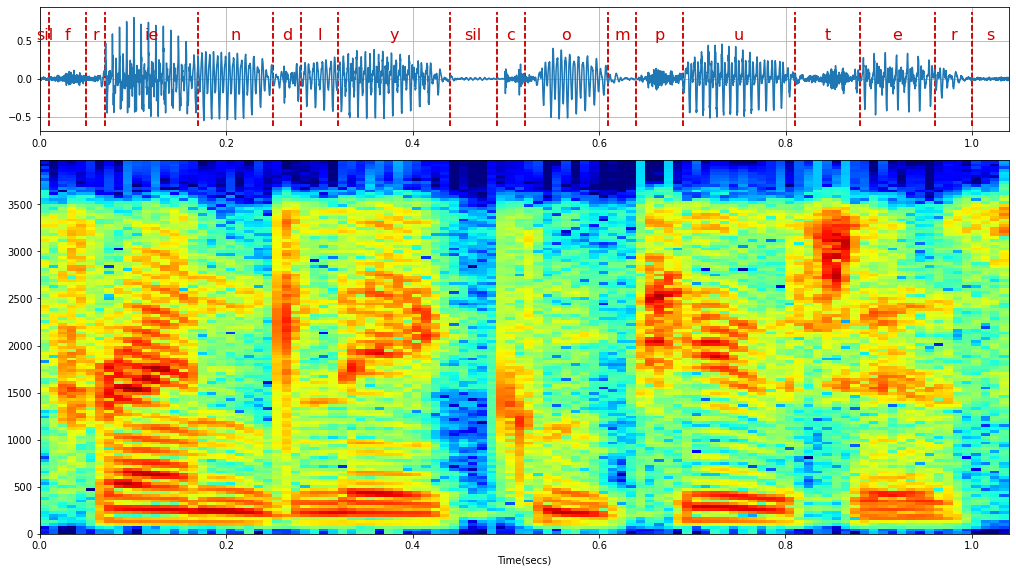

In [8]:
# compute a spectrogram as starting point for further analysis
shift=0.01
length=0.03
n_shift = int(shift*sr)
n_length = int(length*sr)
spg = Sps.spectrogram(wavdata,sample_rate=sr,f_shift=shift,n_mels=None)
(nparam,nfr)=spg.shape
d_freq = sr/(2.*(nparam-1))
fig = Spd.PlotSpg(wavdata=wavdata,spgdata=spg,segwav=seg,sample_rate=sr,figsize=(14,8))
fig

In [9]:
import  pyspch.utils as Spu
help(Spu.logf)
Spu.EPS_FLOAT

Help on function logf in module pyspch.utils.utils:

logf(x, eps=1e-39)
    array log with flooring



1e-39

In [15]:
from pyspch.utils.constants import *

In [16]:
EPS_FLOAT

1e-39